In [18]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

In [2]:
# download Wisconsin COVID data from Wisconsin DHS database and save it to data_files folder
url = 'https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv'
urllib.request.urlretrieve(url, 'C://Users//Owner//Desktop//Jupyter//data_files//covid.csv')

('C://Users//Owner//Desktop//Jupyter//data_files//covid.csv',
 <http.client.HTTPMessage at 0x260618dfc88>)

In [85]:
pd.options.display.max_columns = None
wisc = pd.read_csv('data_files//covid.csv', parse_dates=True)
wisc_counties_keep = ['LoadDttm', 'GEOID', 'GEO', 'NAME', 'NEGATIVE', 'POSITIVE', 'DEATHS']
wisc_counties = wisc[wisc['GEO']=='County']
wisc_counties = wisc_counties[wisc_counties_keep]
wisc_counties[['LoadDttm', 'temp']] = wisc_counties['LoadDttm'].str.split(expand=True)
wisc_counties = wisc_counties.drop('temp', axis=1).rename(columns={'LoadDttm':'Date'})
wisc_counties['Date'] = pd.to_datetime(wisc_counties['Date'])
wisc_counties.columns = [i.title() for i in wisc_counties.columns]
wisc_counties = wisc_counties.set_index(['Name', 'Date']).sort_index()

wisc_state = wisc[wisc['GEO']=='State']
wisc_state[['LoadDttm', 'temp']] = wisc_state['LoadDttm'].str.split(expand=True)
wisc_state = wisc_state.drop(['temp', 'OBJECTID', 'GEO', 'NAME', 'GEOID'], axis=1).rename(columns={'LoadDttm':'Date'})
wisc_state.columns = [i.title() for i in wisc_state.columns]
wisc_state['Date'] = pd.to_datetime(wisc_state['Date'])
wisc_state = wisc_state.set_index('Date')
wisc_state.head()

,OBJECTID,GEOID,GEO,NAME,LoadDttm,NEGATIVE,POSITIVE,HOSP_YES,HOSP_NO,HOSP_UNK,POS_FEM,POS_MALE,POS_OTH,POS_0_9,POS_10_19,POS_20_29,POS_30_39,POS_40_49,POS_50_59,POS_60_69,POS_70_79,POS_80_89,POS_90,DEATHS,DTHS_FEM,DTHS_OTH,DTHS_MALE,DTHS_0_9,DTHS_10_19,DTHS_20_29,DTHS_30_39,DTHS_40_49,DTHS_50_59,DTHS_60_69,DTHS_70_79,DTHS_80_89,DTHS_90,IP_Y_0_9,IP_Y_10_19,IP_Y_20_29,IP_Y_30_39,IP_Y_40_49,IP_Y_50_59,IP_Y_60_69,IP_Y_70_79,IP_Y_80_89,IP_Y_90,IP_N_0_9,IP_N_10_19,IP_N_20_29,IP_N_30_39,IP_N_40_49,IP_N_50_59,IP_N_60_69,IP_N_70_79,IP_N_80_89,IP_N_90,IP_U_0_9,IP_U_10_19,IP_U_20_29,IP_U_30_39,IP_U_40_49,IP_U_50_59,IP_U_60_69,IP_U_70_79,IP_U_80_89,IP_U_90,IC_YES,IC_Y_0_9,IC_Y_10_19,IC_Y_20_29,IC_Y_30_39,IC_Y_40_49,IC_Y_50_59,IC_Y_60_69,IC_Y_70_79,IC_Y_80_89,IC_Y_90,POS_AIAN,POS_ASN,POS_BLK,POS_WHT,POS_MLTOTH,POS_UNK,POS_E_HSP,POS_E_NHSP,POS_E_UNK,DTH_AIAN,DTH_ASN,DTH_BLK,DTH_WHT,DTH_MLTOTH,DTH_UNK,DTH_E_HSP,DTH_E_NHSP,DTH_E_UNK,POS_HC_Y,POS_HC_N,POS_HC_UNK,DTH_NEW,POS_NEW,NEG_NEW,TEST_NEW
0,1,55,State,WI,2020/03/15 19:00:00+00,313.0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,55001,County,Adams,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,55003,County,Ashland,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,55005,County,Barron,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,55007,County,Bayfield,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,55067,55089990000,Census tract,NaN,2020/05/16 12:52:52+00,-999.0,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

C:\Users\Owner\Anaconda3_2\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


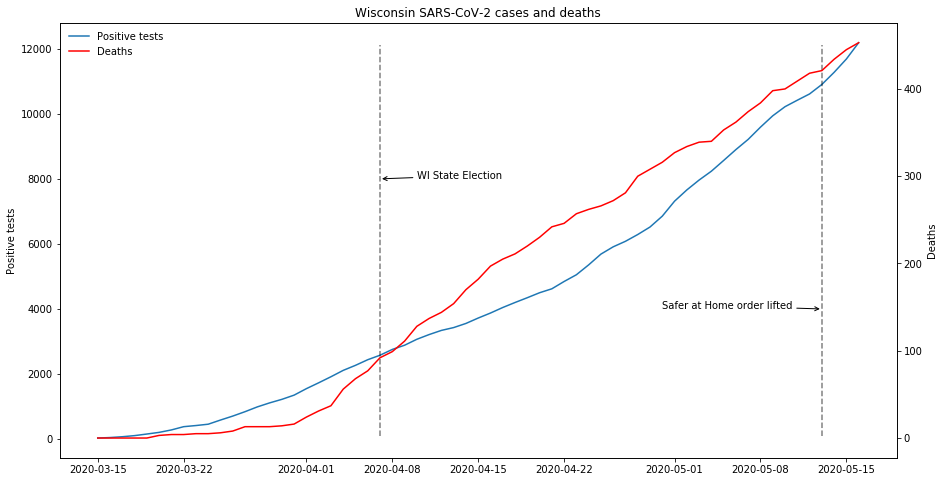

In [4]:
fig, ax = plt.subplots(figsize=[15,8])

ln1 = ax.plot(wisc_state.index, wisc_state['Positive'], label='Positive tests')
ax.axvline(x='2020/04/07', ymin=0.05, ymax=0.95,ls='--', c='black', alpha=0.5)
ax.axvline(x='2020/05/13', ymin=0.05, ymax=0.95, ls='--', c='black', alpha=0.5)
ax.set_ylabel('Positive tests')
ax.set_title('Wisconsin SARS-CoV-2 cases and deaths')
plt.annotate('WI State Election', ['2020-04-07', 8000], xytext=['2020-04-10', 8000], arrowprops=dict(arrowstyle='->'))
plt.annotate('Safer at Home order lifted', ['2020-05-13', 4000], xytext=['2020-04-30', 4000], arrowprops=dict(arrowstyle='->'))

ax2 = ax.twinx()

ln2 = ax2.plot(wisc_state.index, wisc_state['Deaths'], c='red', label='Deaths')
ax2.set_ylabel('Deaths')

lns = ln1+ln2
labels = [i.get_label() for i in lns]
ax.legend(lns, labels, frameon=False)

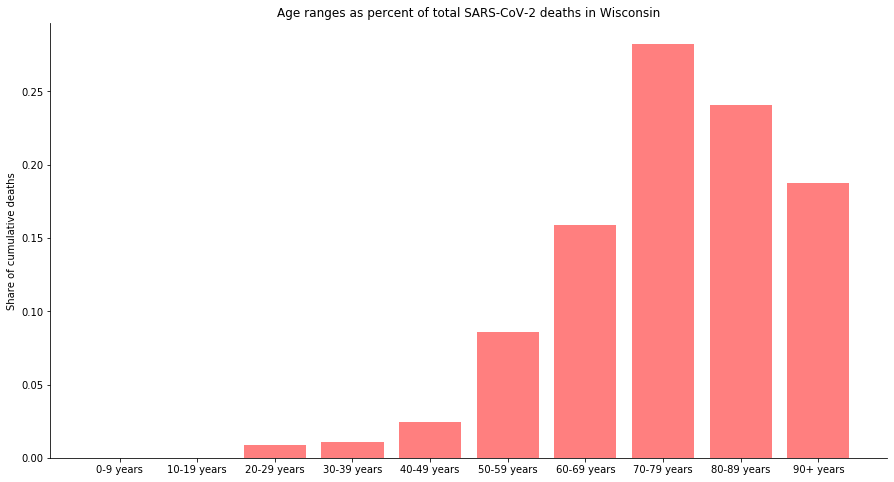

In [5]:
death_keep = ['Dths_0_9', 'Dths_10_19', 'Dths_20_29', 'Dths_30_39',
              'Dths_40_49', 'Dths_50_59', 'Dths_60_69', 'Dths_70_79',
              'Dths_80_89', 'Dths_90']

wisc_deaths = wisc_state[death_keep][-1:].transpose()
wisc_deaths.columns = ['Deaths']
wisc_deaths['Percentage'] = wisc_deaths['Deaths'] / sum(wisc_deaths['Deaths'])
wisc_deaths.index = ['0-9 years', '10-19 years', '20-29 years', '30-39 years',
                     '40-49 years', '50-59 years', '60-69 years', '70-79 years',
                     '80-89 years', '90+ years']

fig, ax = plt.subplots(figsize=[15,8])

ax.bar(wisc_deaths.index, wisc_deaths['Percentage'], color='red', alpha=0.5)
ax.set_ylabel('Share of cumulative deaths')
ax.set_title('Age ranges as percent of total SARS-CoV-2 deaths in Wisconsin')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [80]:
wisc_testing = wisc_state[['Pos_New','Neg_New', 'Test_New', 'Dth_New']]

# For some reason the value for 3-30 was entered as a negative. This function goes through the entire df and converts
# negative values to positive

def negative_cleanup(value):
    if value < 0:
        return abs(value)
    else:
        return value

wisc_testing = wisc_testing.applymap(lambda x: negative_cleanup(x))
wisc_testing['Pct_Pos'] = round((wisc_testing['Pos_New'] / wisc_testing['Test_New']), 2)
wisc_testing['Pct_Pos_14'] = wisc_testing['Pct_Pos'].rolling(14).mean()
wisc_testing_w = wisc_testing.resample('w').mean()
wisc_testing_w_sum = wisc_testing.resample('w').sum()

wisc_testing

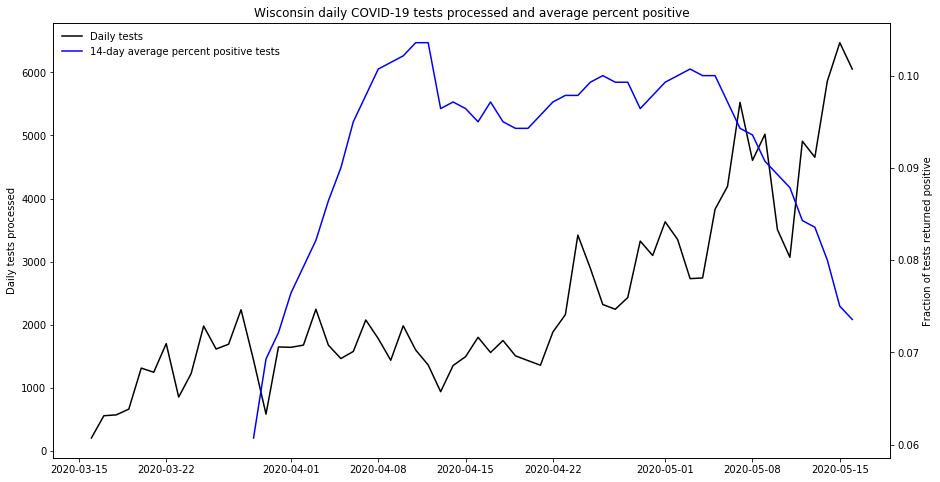

In [87]:
fig, ax = plt.subplots(figsize=[15,8])

ln1 = ax.plot(wisc_testing.index, wisc_testing['Test_New'], label='Daily tests', c='black')
ax.set_ylabel('Daily tests processed')
ax.set_title('Wisconsin daily COVID-19 tests processed and average percent positive')

ax2 = ax.twinx()
ln2 = ax2.plot(wisc_testing.index, wisc_testing['Pct_Pos_14'], label='14-day average percent positive tests', c='blue')
ax2.set_ylabel('Fraction of tests returned positive')

lns = ln1+ln2
labels = [i.get_label() for i in lns]
ax.legend(lns, labels, frameon=False)

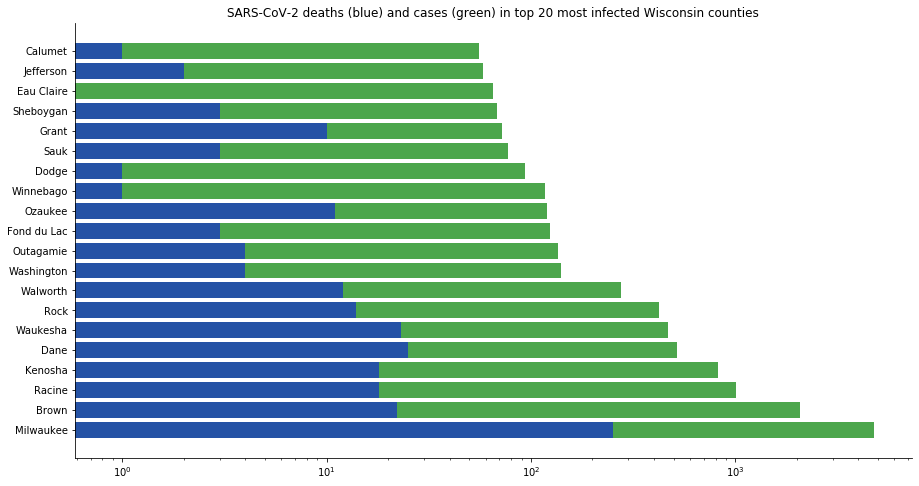

In [65]:
counties = []
counties = pd.DataFrame(counties)
counties['Name'] = np.nan
init = 0

for i in wisc_counties.index.get_level_values(0).unique():
    counties = counties.append(wisc_counties.xs(i, level=0)[-1:])
    counties.iloc[init, 3] = i
    init += 1

counties = counties.reset_index().set_index('Name')
counties = counties.drop(['Geo', 'Geoid', 'index'], axis=1)
counties['Total'] = counties['Negative'] + counties['Positive']

counties_ordered = counties.sort_values('Positive', ascending=False)
counties_ordered = counties_ordered[:20]

fig, ax = plt.subplots(figsize=[15,8])

ax.barh(counties_ordered.index, counties_ordered['Positive'], color='green', alpha=0.7, log=True, label='Positive Tests')
ax.barh(counties_ordered.index, counties_ordered['Deaths'], color='blue', alpha=0.5, label='Total deaths')
ax.set_title('SARS-CoV-2 deaths (blue) and cases (green) in top 20 most infected Wisconsin counties')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)